In [83]:
##https://medium.com/@nutanbhogendrasharma/image-classification-model-mobilenet-v2-from-tensorflow-hub-8191b28a202a

# Image Classification Model MobileNet V2 from TensorFlow Hub

In [84]:
#Download mobilenet_v2 classifier
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

In [85]:
#Create an instance of MobileNetV2 model
classifier_model = mobilenet_v2

In [86]:
#import libraries
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image
import numpy as np
import matplotlib.pylab as plt

In [87]:
#Wrap classifier model as Keras layer with hub.KerasLayer
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

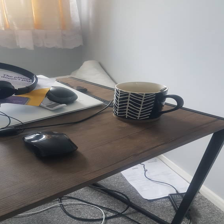

In [88]:
img_pred = 'mug.jpeg'
img_pred = Image.open(img_pred).resize(IMAGE_SHAPE)
img_pred

In [89]:
#rescale the image
img_pred = np.array(img_pred)/255.0
img_pred.shape


(224, 224, 3)

In [90]:
img_pred

array([[[0.94509804, 0.85098039, 0.74901961],
        [0.95294118, 0.86666667, 0.74117647],
        [0.97647059, 0.90588235, 0.77647059],
        ...,
        [0.7254902 , 0.75686275, 0.76862745],
        [0.7254902 , 0.75686275, 0.76862745],
        [0.7254902 , 0.75686275, 0.76862745]],

       [[0.94901961, 0.85490196, 0.75294118],
        [0.94509804, 0.85490196, 0.7254902 ],
        [0.97254902, 0.89803922, 0.76862745],
        ...,
        [0.7254902 , 0.75686275, 0.76862745],
        [0.7254902 , 0.75686275, 0.76862745],
        [0.7254902 , 0.75686275, 0.76862745]],

       [[0.9372549 , 0.84313725, 0.74117647],
        [0.92941176, 0.83921569, 0.71372549],
        [0.96078431, 0.88235294, 0.74901961],
        ...,
        [0.7254902 , 0.75686275, 0.76862745],
        [0.7254902 , 0.75686275, 0.76862745],
        [0.7254902 , 0.75686275, 0.76862745]],

       ...,

       [[0.23137255, 0.23137255, 0.23137255],
        [0.27843137, 0.27843137, 0.27843137],
        [0.3372549 , 0

In [98]:
#Add a batch dimension with np.newaxis
img_pred_expended_dim = img_pred[np.newaxis, ...]
img_pred_expended_dim.shape

(1, 224, 224, 3)

In [92]:
#predict
result = classifier.predict(img_pred_expended_dim)
result.shape

(1, 1001)

In [93]:
#Get the top class ID
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

<tf.Tensor: shape=(), dtype=int64, numpy=403>

In [94]:
#Decode the predictions
#Download the ImageNet dataset labels

labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
labels_path

'/root/.keras/datasets/ImageNetLabels.txt'

In [95]:
#Read the ImageNet dataset labels
imagenet_labels = np.array(open(labels_path).read().splitlines())
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

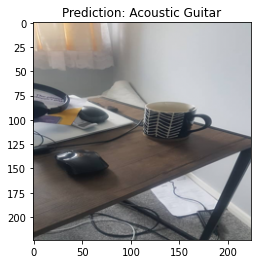

In [96]:
#Plot the image and predicted class
plt.imshow(img_pred)
predicted_class_name = imagenet_labels[predicted_class]
plt.title("Prediction: " + predicted_class_name.title())
plt.show()